In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import warnings
warnings.filterwarnings("ignore")

def makeBrazilianPlot(days, thestrategy, theprob, ntest,engag, rblue, nasym, thecityseed, theseed):
    
    fig = plt.figure()
    fig.set_figheight(11)
    fig.set_figwidth(11)

    listInfected=[[] for i in range(6)]
    listHealthy=[[] for i in range(6)]
    listQuarantine=[[] for i in range(6)]
    listCured=[[] for i in range(6)]
    listR=[[] for i in range(6)]

    rangeStrategies=thestrategy  
   
    for strategy in rangeStrategies:
     
        theDays=np.arange(days)
        rangeTesting = [ntest]
        rangeProb=[theprob]
        rangeEngage=[engag]
        rangeBlue=[rblue]
        rangeAsym=[nasym]
        rangeSeeds=np.arange(0,theseed)
        rangeCitySeeds=np.arange(0,thecityseed)
        
        
        
        if strategy == 0 or strategy == 4:
            rangeTesting=[0]
        
        if strategy ==0 or strategy == 1 or strategy ==2:
            rangeEngage=[0]
            rangeBlue=[0]
           # rangeAsym=[0]
        for prob in rangeProb:
            
            for testing in rangeTesting:
            
                for engage in rangeEngage:
                    for lblue in rangeBlue:
                        for asym in rangeAsym:
                            for seed in rangeSeeds:
                                for cityseed in rangeCitySeeds:
                                    if (strategy ==0):
                                        folder = "City_500_strategy"+str(strategy)+"_probability"+str(prob)+"_asymp"+str(asym)
                                        f= "CityNewRunning/"+folder+"/"+"output_"+folder+"_seed"+str(seed)+"_CitySeed"+str(cityseed)+".csv" 
                                    elif (strategy == 1 or strategy ==2):
                                        folder = "City_500_strategy"+str(strategy)+"_probability"+str(prob)+"_testing"+str(testing)+"_asymp"+str(asym)
                                        f= "CityNewRunning/"+folder+"/"+"output_"+folder+"_seed"+str(seed)+"_CitySeed"+str(cityseed)+".csv" 
                                    elif (strategy ==3 or strategy == 5):
                                        folder = "City_500_strategy"+str(strategy)+"_probability"+str(prob)+"_testing"+str(testing)+"_engage"+str(engage)+"_lblue"+str(lblue)+"_asymp"+str(asym)
                                        f= "CityNewRunning/"+folder+"/"+"output_"+folder+"_seed"+str(seed)+"_CitySeed"+str(cityseed)+".csv"  
                                    elif (strategy ==4):
                                        folder = "City_500_strategy"+str(strategy)+"_probability"+str(prob)+"_engage"+str(engage)+"_lblue"+str(lblue)+"_asymp"+str(asym)
                                        f= "CityNewRunning/"+folder+"/"+"output_"+folder+"_seed"+str(seed)+"_CitySeed"+str(cityseed)+".csv"  
                                    numpyHealthy=np.genfromtxt(f,delimiter=',')[1]
                                    numpyInfected=np.genfromtxt(f,delimiter=',')[2]
                                    numpyCured=np.genfromtxt(f,delimiter=',')[3]
                                    numpyQuarantine=np.genfromtxt(f,delimiter=',')[4]

                                    nCitizens=np.genfromtxt(f,delimiter=',')[1][0]+1
                                    listHealthy[strategy].append(100*numpyHealthy/nCitizens)
                                    listQuarantine[strategy].append(100*numpyQuarantine/nCitizens)
                                    listInfected[strategy].append(100*numpyInfected/nCitizens)
                                    listCured[strategy].append(100*numpyCured/nCitizens)
                                
                                    #Calculate R
                                    arrayR=np.array([])

                                    for i in np.arange(1,len(numpyInfected)):
                                        arrayR=np.append(arrayR,(numpyInfected[i] - numpyInfected[i-1]) / numpyInfected[i-1])
                                    listR[strategy].append(arrayR)

    cmap = ['k','b','g','c','r','m','n']
                   
       
    for i in rangeStrategies:
    

        #Plot the infected plot

        dfInfected = pd.DataFrame(data=listInfected[i])
        theMeanInfected=np.array([])
        theStdevInfected=np.array([])
        for day in theDays:
            theMeanInfected=np.append(theMeanInfected,np.mean(dfInfected[day]))
            theStdevInfected=np.append(theStdevInfected, np.std(dfInfected[day]))
        subInfected=plt.subplot(3, 2, 1)
        plt.plot(theDays, theMeanInfected, cmap[i]+'-', linewidth=1,label="strat"+str(i))
       # plt.fill_between(theDays, theMeanInfected-2*theStdevInfected, theMeanInfected+2*theStdevInfected, edgecolor='#3F7F4C', facecolor='#7EFF99',    linewidth=0, alpha=0.5)
        plt.fill_between(theDays, theMeanInfected-theStdevInfected, theMeanInfected+theStdevInfected, edgecolor=cmap[i], facecolor=cmap[i],    linewidth=0, alpha=0.1)
        subInfected.set_title("% infected people")
        leg = plt.legend(loc='upper left')
        plt.axis([0, days, 0, 105])

        
        #Plot the healthy plot
        dfHealthy = pd.DataFrame(data=listHealthy[i])
        theMeanHealthy=np.array([])
        theStdevHealthy=np.array([])
        for day in theDays:
            theMeanHealthy=np.append(theMeanHealthy,np.mean(dfHealthy[day]))
            theStdevHealthy=np.append(theStdevHealthy, np.std(dfHealthy[day]))
        subHealthy=plt.subplot(3, 2, 2)
        plt.plot(theDays, theMeanHealthy, cmap[i]+'-', linewidth=1,label="strat"+str(i))
       # plt.fill_between(theDays, theMeanHealthy-2*theStdevHealthy, theMeanHealthy+2*theStdevHealthy, edgecolor='#3F7F4C', facecolor='#7EFF99',    linewidth=0, alpha=0.5)
        plt.fill_between(theDays, theMeanHealthy-theStdevHealthy, theMeanHealthy+theStdevHealthy, edgecolor= cmap[i], facecolor=cmap[i],    linewidth=0, alpha=0.1)
        subHealthy.set_title("% healthy people")
        leg = plt.legend(loc='lower left')
        plt.axis([0, days, 0, 105])

        
        #Plot the Cured plot
        dfCured = pd.DataFrame(data=listCured[i])
        theMeanCured=np.array([])
        theStdevCured=np.array([])
        for day in theDays:
            theMeanCured=np.append(theMeanCured,np.mean(dfCured[day]))
            theStdevCured=np.append(theStdevCured, np.std(dfCured[day]))
        subCured=plt.subplot(3, 2, 3)
        plt.plot(theDays, theMeanCured, cmap[i]+'-', linewidth=1,label="strat"+str(i))
      #  plt.fill_between(theDays, theMeanCured-2*theStdevCured, theMeanCured+2*theStdevCured, edgecolor='#3F7F4C', facecolor='#7EFF99',    linewidth=0, alpha=0.5)
        plt.fill_between(theDays, theMeanCured-theStdevCured, theMeanCured+theStdevCured, edgecolor=cmap[i], facecolor=cmap[i],    linewidth=0, alpha=0.1)
        subCured.set_title("% cured people")
        leg = plt.legend(loc='upper left')
        plt.axis([0, days, 0, 105])


        #Plot the Quarantine plot
        dfQuarantine = pd.DataFrame(data=listQuarantine[i])
        theMeanQuarantine=np.array([])
        theStdevQuarantine=np.array([])
        for day in theDays:
            theMeanQuarantine=np.append(theMeanQuarantine,np.mean(dfQuarantine[day]))
            theStdevQuarantine=np.append(theStdevQuarantine, np.std(dfQuarantine[day]))
        subQuarantine=plt.subplot(3, 2, 4)
        plt.plot(theDays, theMeanQuarantine, cmap[i]+'-', linewidth=1,label="strat"+str(i))
       # plt.fill_between(theDays, theMeanQuarantine-2*theStdevQuarantine, theMeanQuarantine+2*theStdevQuarantine, edgecolor='#3F7F4C', facecolor='#7EFF99',    linewidth=0, alpha=0.5)
        plt.fill_between(theDays, theMeanQuarantine-theStdevQuarantine, theMeanQuarantine+theStdevQuarantine, edgecolor=cmap[i], facecolor=cmap[i],    linewidth=0, alpha=0.1)
        subQuarantine.set_title("% quarantined people")
        leg = plt.legend(loc='upper left')
        plt.axis([0, days, 0, 105])

        #Plot the R plot

        dfR = pd.DataFrame(data=listR[i])
        theMeanR=np.array([])
        theStdevR=np.array([])
        theDaysR=np.arange(days-1)
        for day in theDaysR:
            theMeanR=np.append(theMeanR,np.mean(dfR[day]))
            theStdevR=np.append(theStdevR, np.std(dfR[day]))
        subR=plt.subplot(3, 2, 5)
        plt.plot(theDaysR, theMeanR, cmap[i]+'-', linewidth=1,label="strat"+str(i))
       # plt.fill_between(theDaysR, theMeanR-2*theStdevR, theMeanR+2*theStdevR, edgecolor='#3F7F4C', facecolor='#7EFF99',    linewidth=0, alpha=0.5)
       # plt.fill_between(theDaysR, theMeanR-theStdevR, theMeanR+theStdevR, edgecolor='#1B2ACC', facecolor='#ffff00',    linewidth=0, alpha=0.2)
        plt.fill_between(theDaysR, theMeanR-theStdevR, theMeanR+theStdevR, edgecolor= cmap[i], facecolor=cmap[i],    linewidth=0, alpha=0.2)

        subR.set_title("R factor")
        leg = plt.legend(loc='upper right')
        plt.axis([0, days, -2, 4])
        
        
    fig.suptitle("Tests: " + str(ntest) +  " , Engagement: " + str(engag) + ", Bluetooth range: " + str(rblue) + " and Asymptomatics: " + str(nasym) +"\n City seed: " +str(thecityseed) + " - seed: " + str(theseed) +" - Probability: " + str(theprob))   
    plt.savefig("Figures/"+'test'+str(ntest)+"_asymp"+str(nasym)+"_prob"+str(theprob)+".png")

    plt.show()


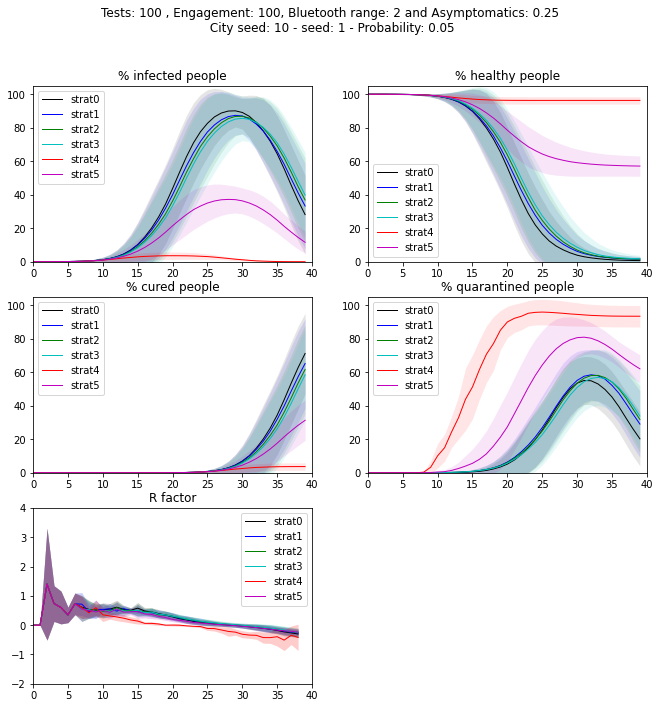

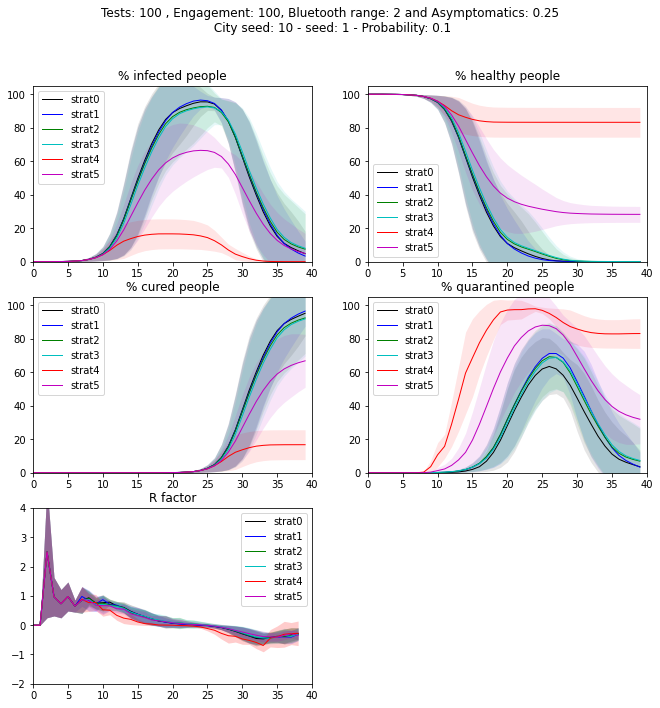

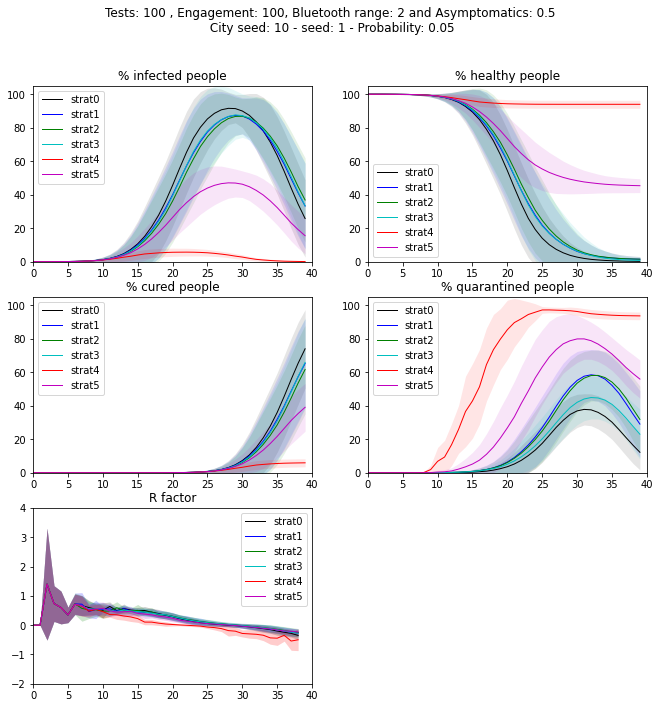

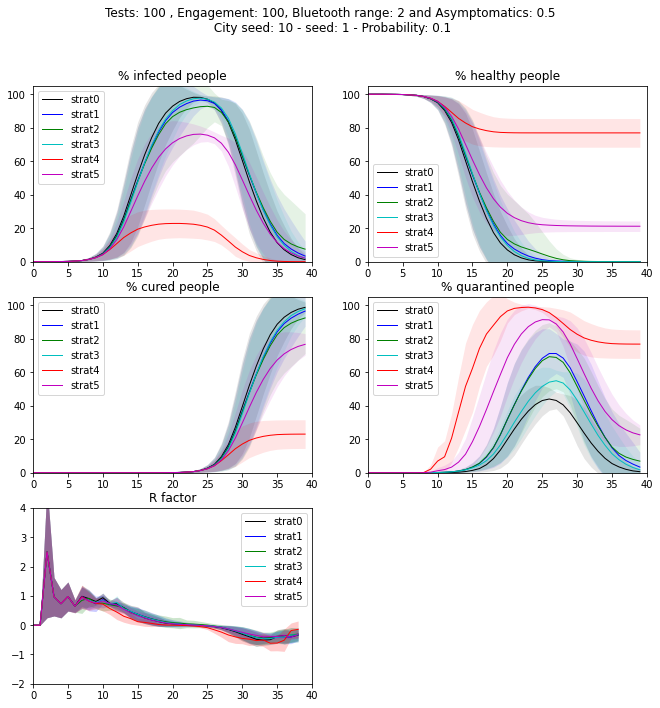

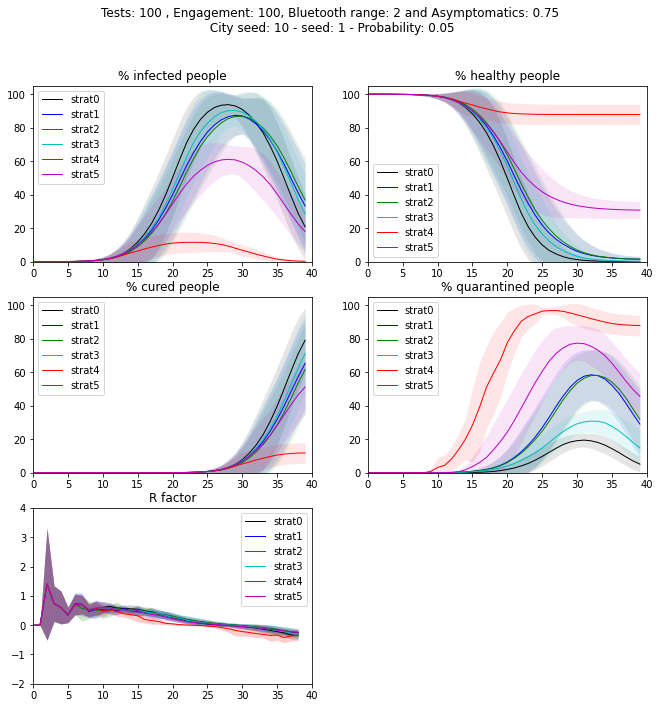

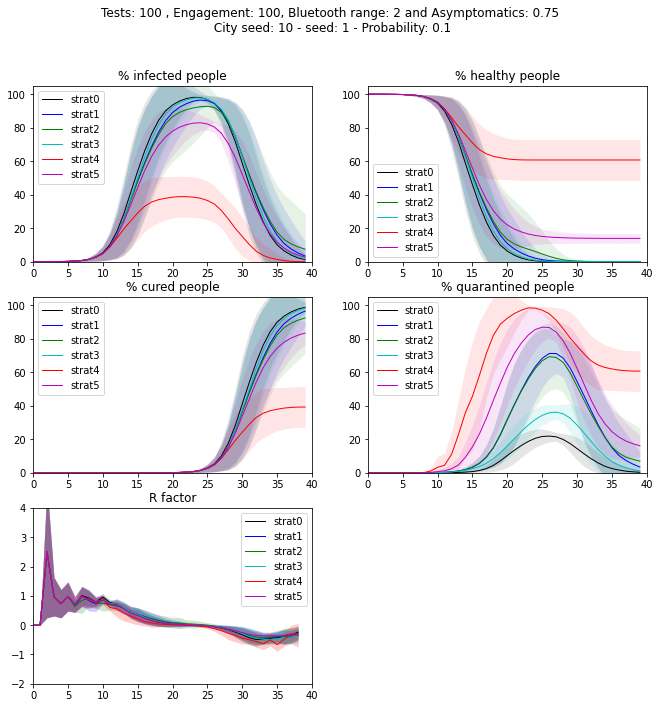

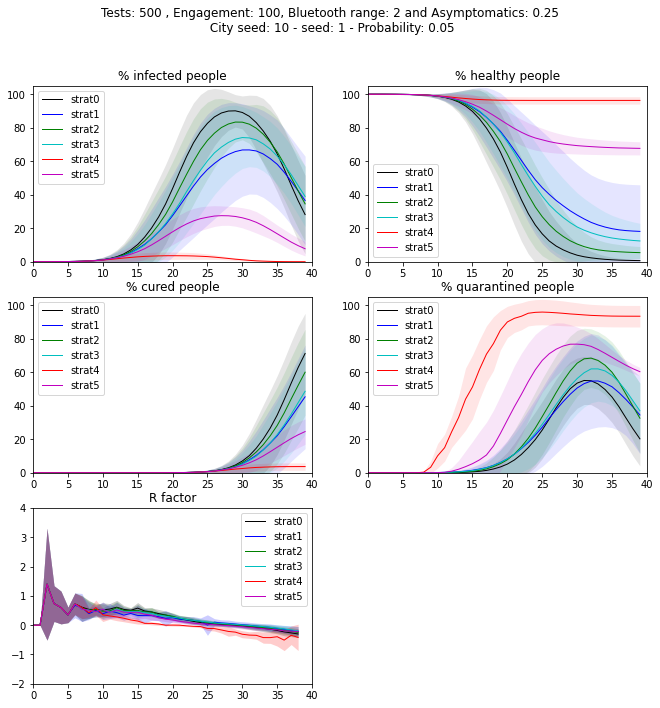

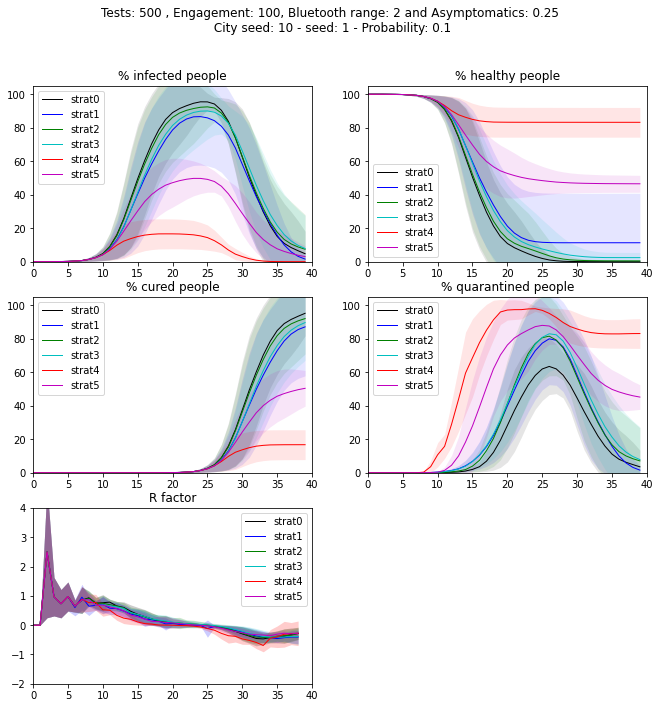

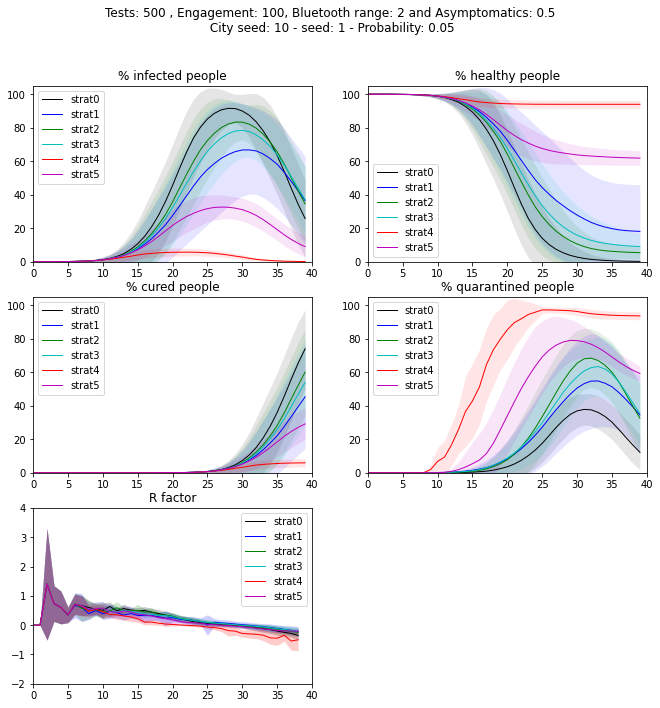

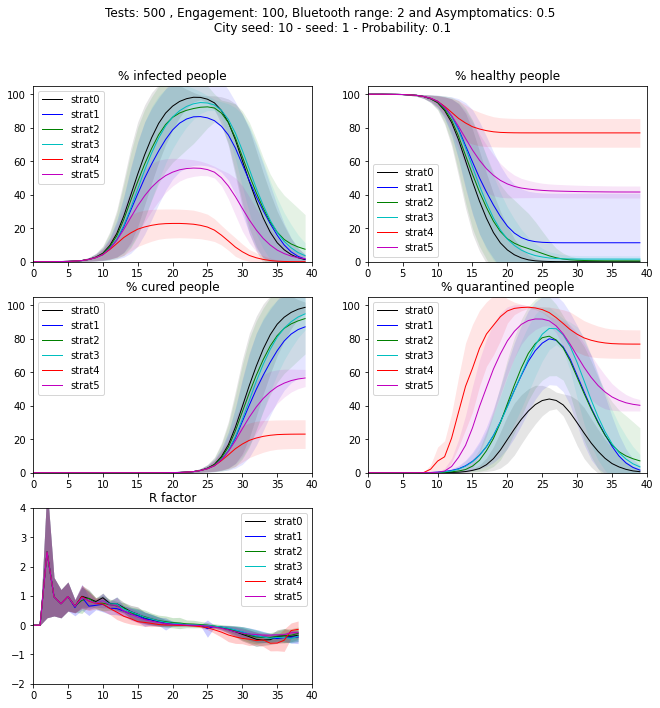

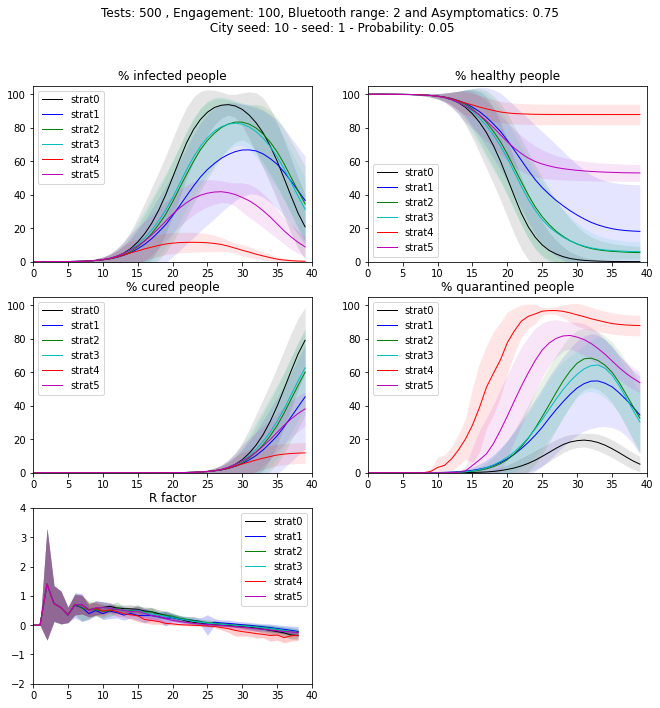

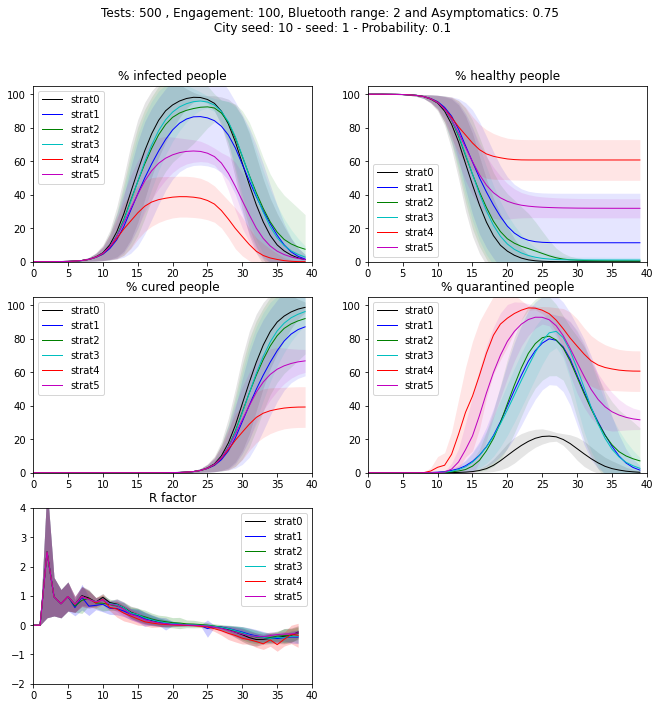

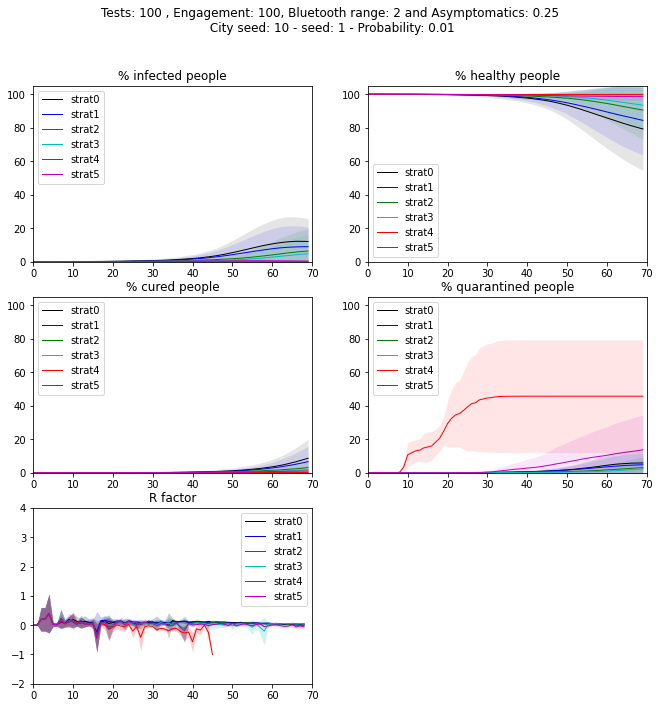

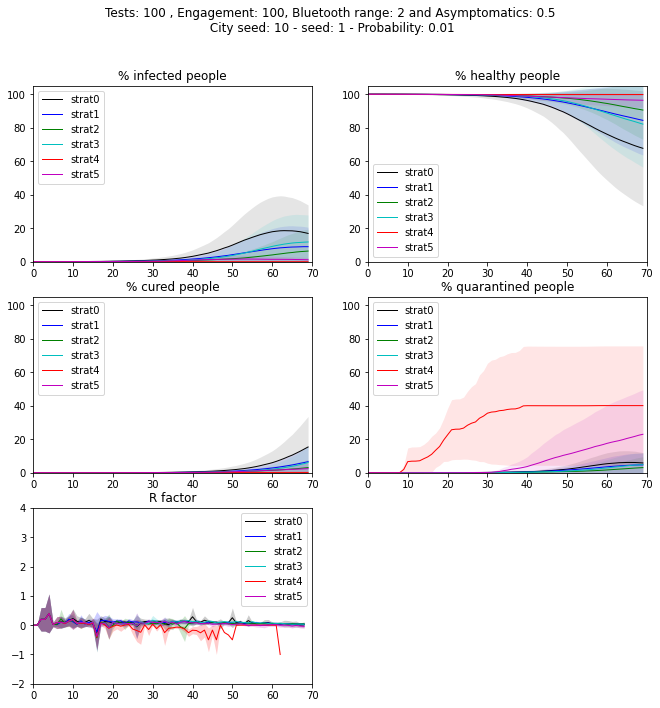

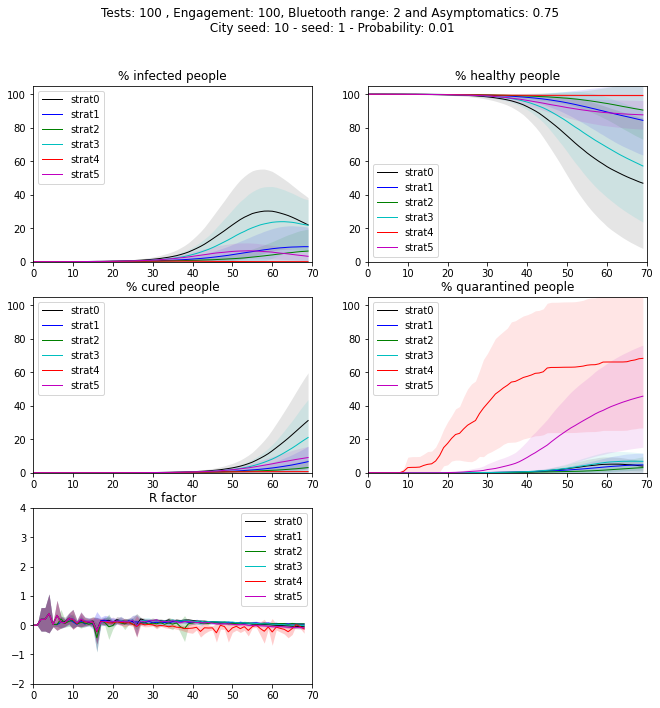

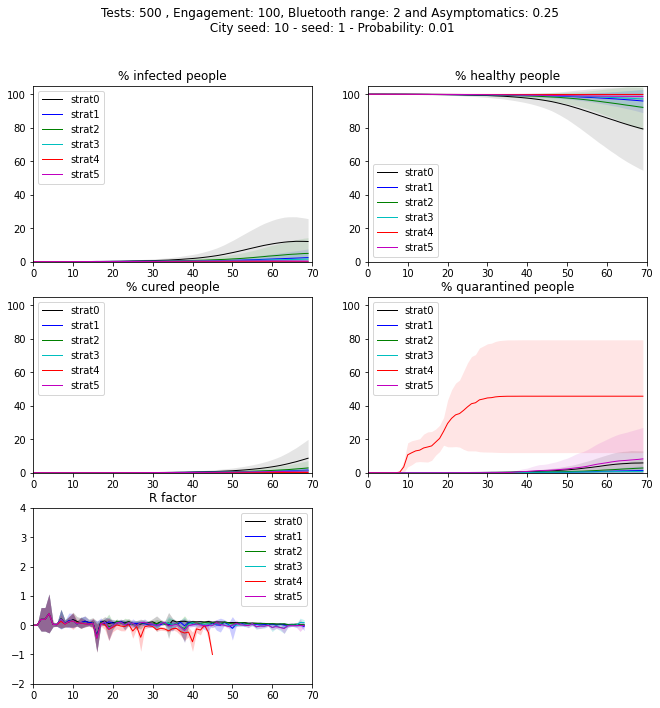

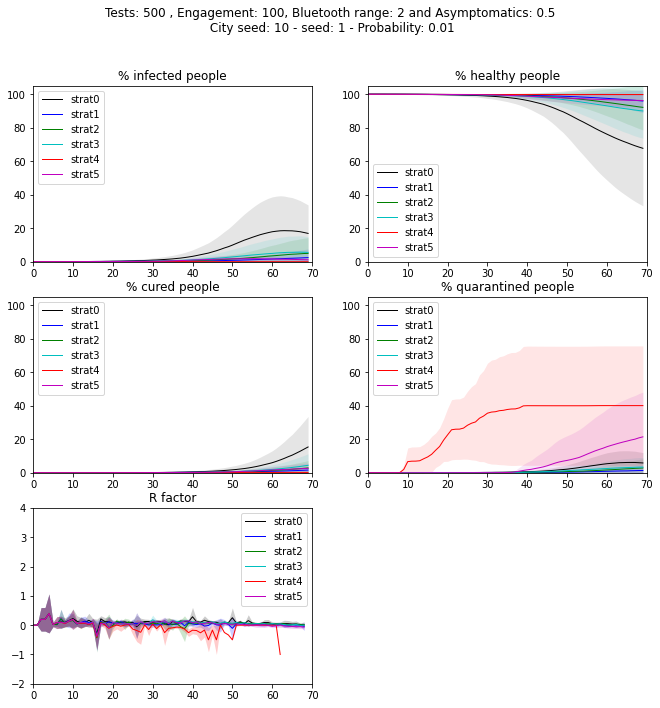

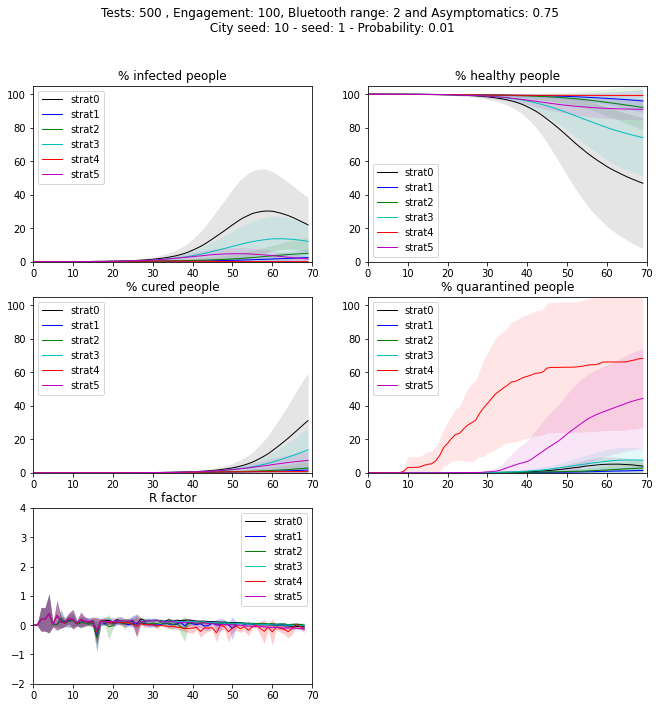

In [2]:
#days, thestrategy,ntest,engag, rblue, nasym, thecityseed, theseed

for ntest in [100,500]:
    for nasym in [0.25, 0.5, 0.75]:
        for prob in [0.05, 0.1]:
            try: 
                makeBrazilianPlot(40, [0,1,2,3,4,5], prob,ntest, 100, 2, nasym, 10, 1)
            except: 
                continue

for ntest in [100,500]:
    for nasym in [0.25, 0.5, 0.75]:
        for prob in [0.01]:
            try:
                makeBrazilianPlot(70, [0,1,2,3,4,5], prob,ntest, 100, 2, nasym, 10, 1)
            except:
                continue